# Exercise 3

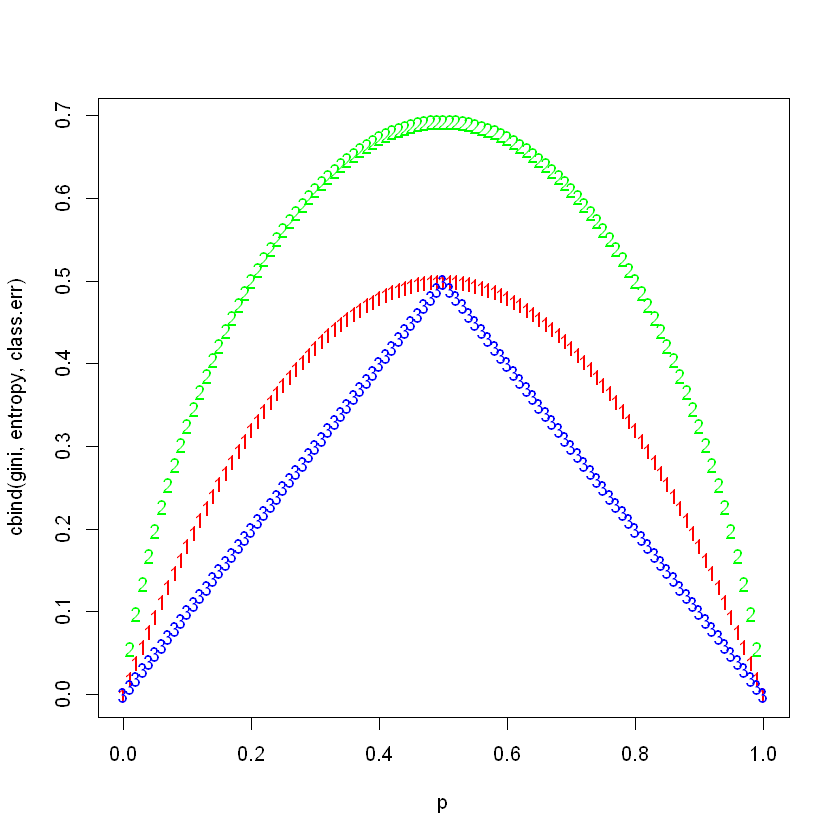

In [1]:
p = seq(0, 1, 0.01)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, class.err), col = c("red", "green", "blue"))

# Exercise5

In [2]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [3]:
sum(p >= 0.5) > sum(p < 0.5)

[1] TRUE

In [4]:
mean(p)

[1] 0.45

# Exercise 8

In [5]:
library(ISLR)
attach(Carseats)
set.seed(1)

train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

Warning message:
"package 'ISLR' was built under R version 3.6.2"

In [6]:
library(tree)
tree.carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)

Warning message:
"package 'tree' was built under R version 3.6.3"


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

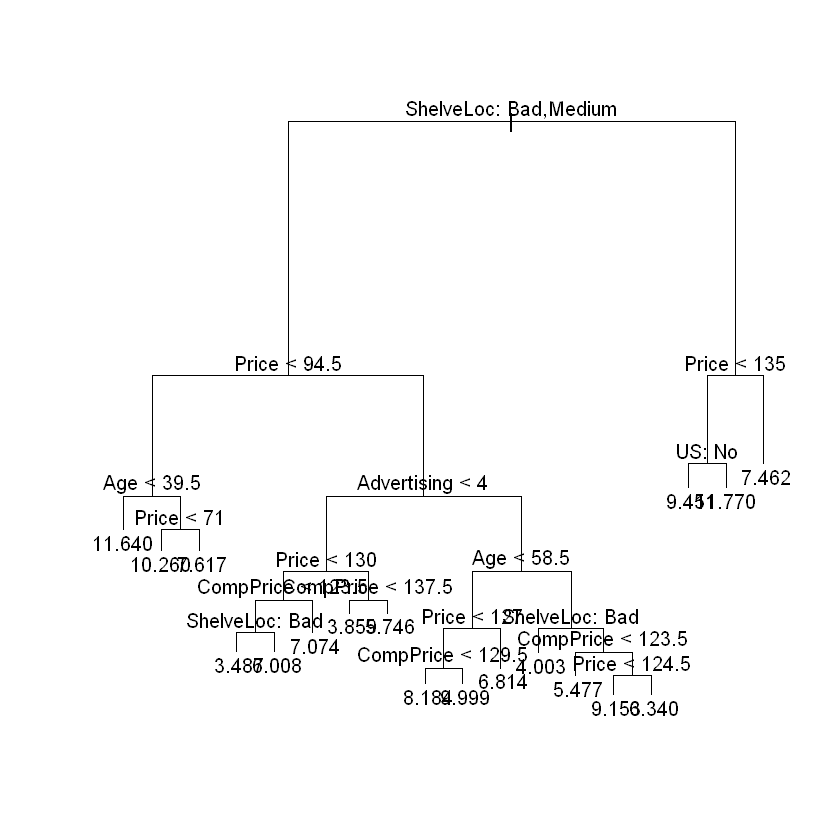

In [7]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [8]:
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

[1] 4.922039

c

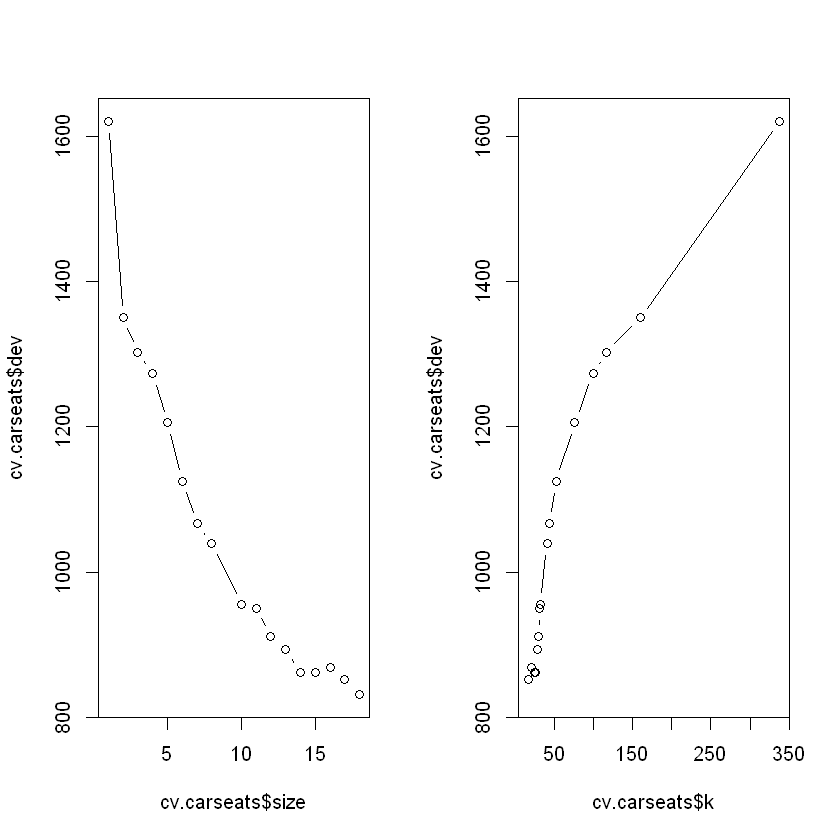

In [9]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")

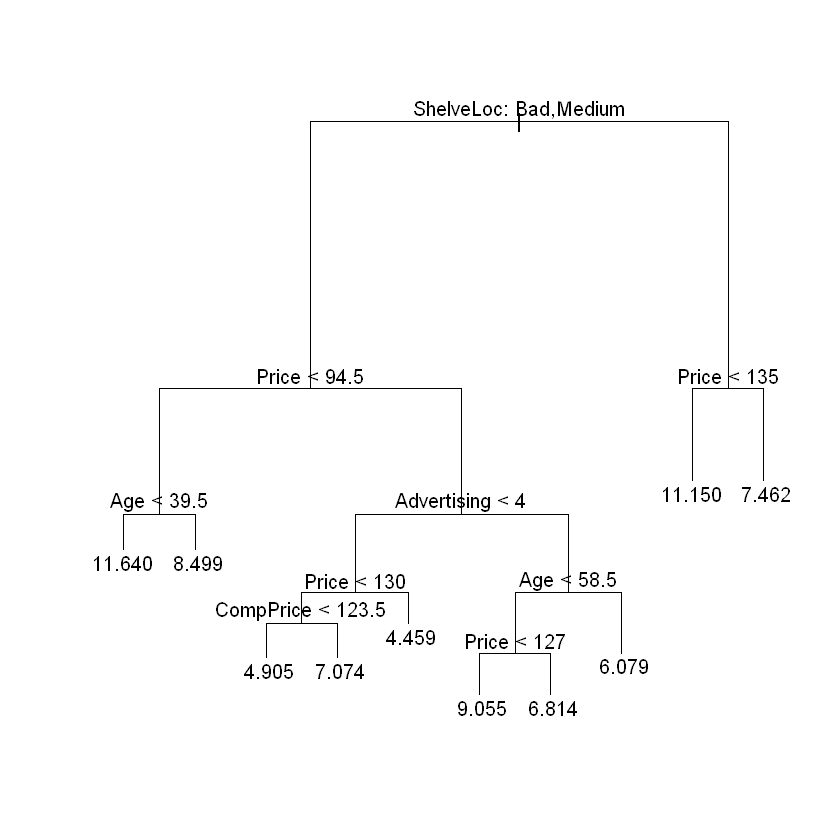

In [10]:
# Best size = 9
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [11]:
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

[1] 4.918134

d

In [14]:
library(randomForest)
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)

Warning message:
"package 'randomForest' was built under R version 3.6.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] 2.657296

In [15]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


e

In [16]:
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)

[1] 2.701665

In [17]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,19.8160444,162.73603
Income,2.8940268,106.96093
Advertising,11.6799573,106.30923
Population,-1.6998805,79.04937
Price,46.3454015,448.33554
ShelveLoc,40.4412189,334.33610
Age,12.5440659,169.06125
Education,1.0762096,55.87510
Urban,0.5703583,13.21963
US,5.8799999,25.59797


# Exercise 9

In [20]:
library(ISLR)
attach(OJ)
set.seed(1000)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase



In [21]:
library(tree)
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7486 = 592.9 / 792 
Misclassification error rate: 0.16 = 128 / 800 

In [22]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.5036 353  422.60 MM ( 0.28612 0.71388 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.035047 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.035047 113  108.50 MM ( 0.18584 0.81416 ) *
     5) LoyalCH > 0.276142 183  250.30 MM ( 0.43169 0.56831 )  
      10) PriceDiff < 0.05 78   79.16 MM ( 0.20513 0.79487 ) *
      11) PriceDiff > 0.05 105  141.30 CH ( 0.60000 0.40000 ) *
   3) LoyalCH > 0.5036 447  337.30 CH ( 0.87472 0.12528 )  
     6) LoyalCH < 0.764572 187  206.40 CH ( 0.75936 0.24064 )  
      12) SalePriceMM < 2.125 120  156.60 CH ( 0.64167 0.35833 )  
        24) PriceDiff < -0.35 16   17.99 MM ( 0.25000 0.75000 ) *
        25) PriceDiff > -0.35 104  126.70 CH ( 0.70192 0.29808 ) *
      13) SalePriceMM > 2.125 67   17.99 CH ( 0.97015 0.02985 ) *
     7) LoyalCH > 0.764572 260   91.11 CH ( 0.

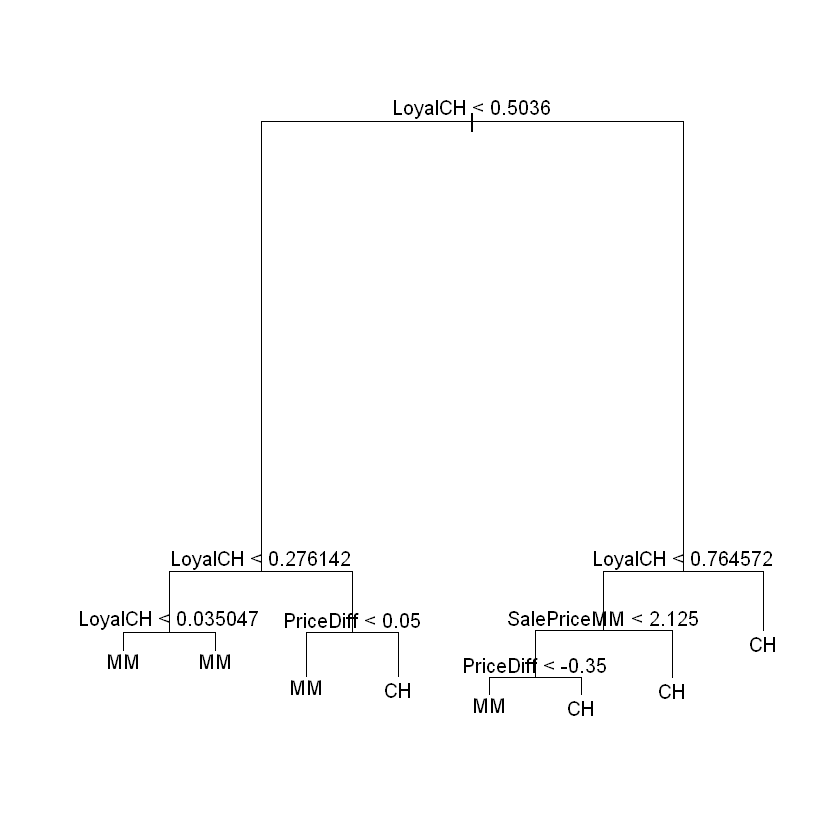

In [23]:
plot(oj.tree)
text(oj.tree, pretty = 0)

In [24]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 150  11
  MM  38  71

In [25]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

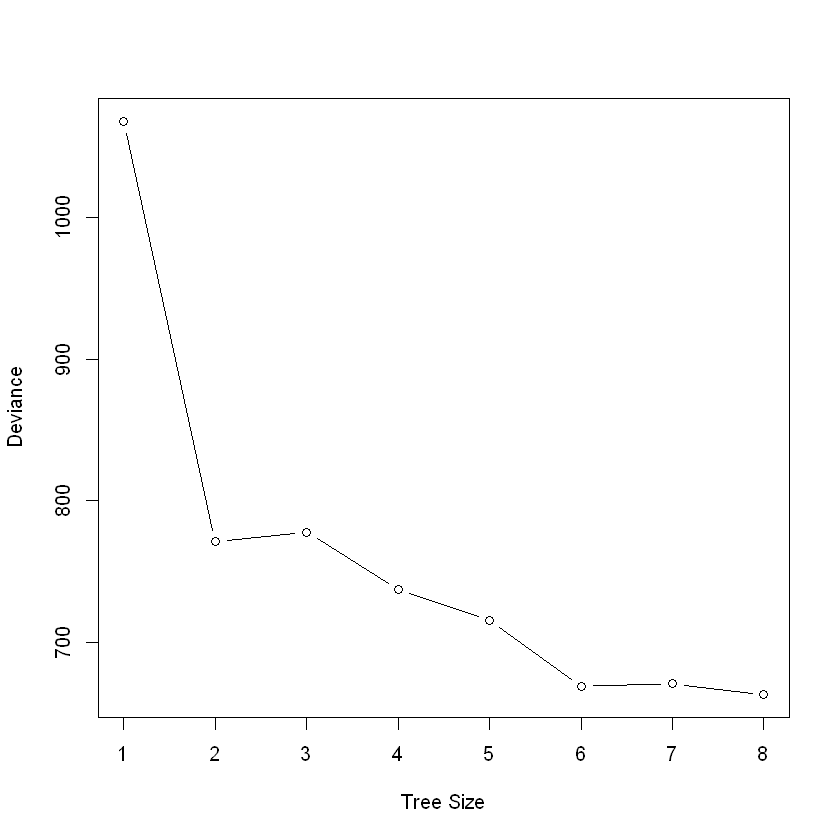

In [26]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

In [29]:
oj.pruned = prune.tree(oj.tree, best = 6)

In [28]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = c(12L, 4L))
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  6 
Residual mean deviance:  0.7773 = 617.2 / 794 
Misclassification error rate: 0.17 = 136 / 800 

# Exercise 10

In [30]:
library(ISLR)
sum(is.na(Hitters$Salary))

[1] 59

In [31]:
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))

[1] 0

In [32]:
Hitters$Salary = log(Hitters$Salary)

In [33]:
train = 1:200
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

Warning message:
"package 'gbm' was built under R version 3.6.2"Loaded gbm 2.1.5


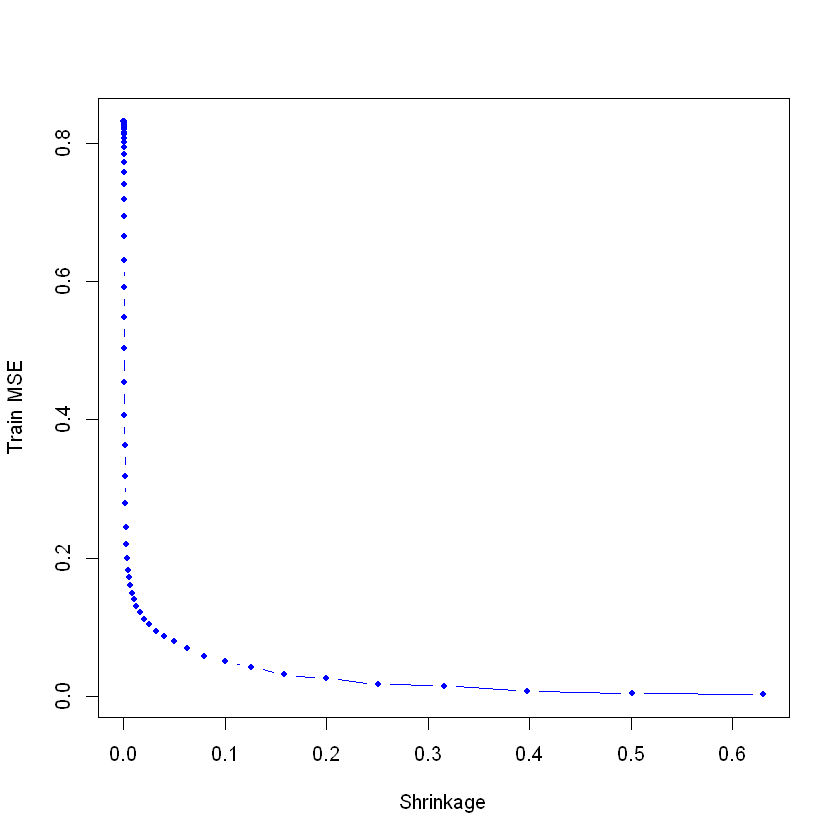

In [34]:
library(gbm)
set.seed(100)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

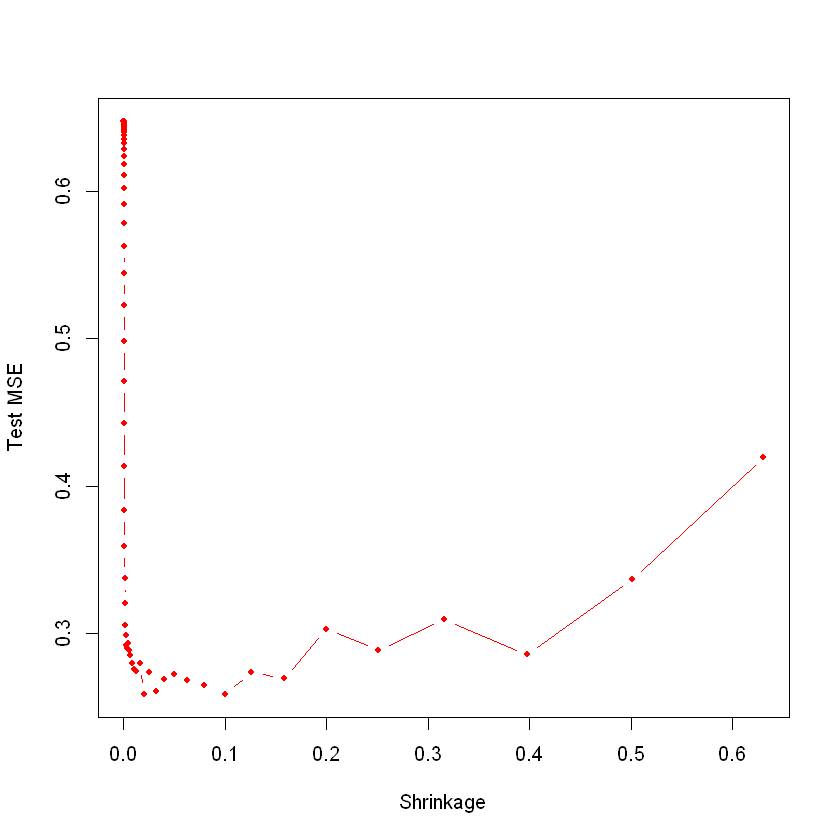

In [35]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [36]:
min(test.errors)

[1] 0.2587138

In [37]:
lambdas[which.min(test.errors)]
#Minimum test error is obtained at λ=0.05.

[1] 0.01995262

In [38]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [39]:
library(glmnet)
set.seed(134)
x = model.matrix(Salary ~ ., data = Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(x, y, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loaded glmnet 3.0-2



[1] 0.4700537

In [ ]:
#Both linear model and regularization like Lasso have higher test MSE than boosting.